<h1><b><font color='green'>Student Score Prediction Model</font><b><h1>

<h3><font color='orange'>This is a supervised machine learning exercise using simple linear regression model . it aims to predict the score of a student based on the number of hours they have studied.<font color='orange'><h3>

In [327]:
#import the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics  
from sklearn.model_selection import train_test_split

firstly, start with Data Collection

Load and read the dataset:

In [314]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

print(df.head(5))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Next , we Explore the data:

In [317]:
#get more understanding of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Next , porcess and clean the data

In [318]:
#check if there are nullable values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Now, Start Data Visualization step by Plotting our data to determine if it is eligible for linear regression model

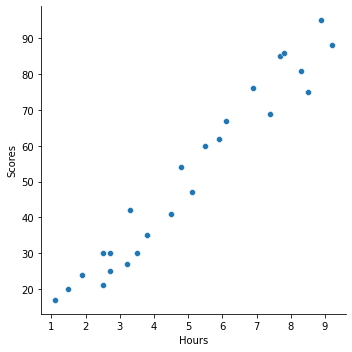

In [319]:
#Scatter Plot using Seaborn Library
sns.relplot(data=df,x="Hours",y='Scores',ci=None,kind='scatter')


by analyzing the plot, it's clear that the data can be used in a linear regression model as there is a clear linear relationship between the dependent and independent variables!

now we prepare our dataset to fit into the model as we split our data to train and test datasets 

In [351]:
#independent variable is Hours
#Dependent variable is Scores
indep= df.iloc[:,:-1].values
dep=df.iloc[:, 1].values

In [352]:
indep

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [353]:
dep

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Train Test Split:

In [369]:
#train test split for Supervised learning
X_train,X_test,Y_train,Y_test = train_test_split(indep,dep)

plot the data in a scatter plot to show the train test split

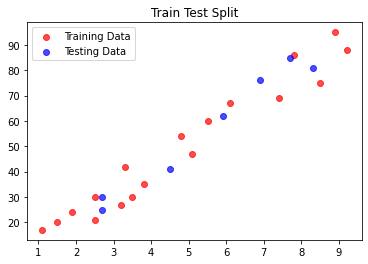

In [370]:
plt.scatter(X_train,Y_train,label='Training Data',color='r',alpha=.7)
plt.scatter(X_test,Y_test,label='Testing Data',color='b',alpha=.7)
plt.legend()
plt.title("Train Test Split")
plt.show()

Linear Regression Model:

In [371]:
#fit the training data into linear regression model
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

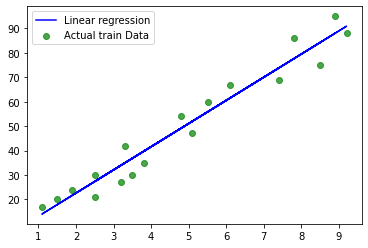

In [372]:
#prediction on train data
prediction=reg.predict(X_train)


#plot the prediction on trained data
plt.plot(X_train,prediction,label='Linear regression',color='b')
plt.scatter(X_train,Y_train,label='Actual train Data',color='g',alpha=.7)
plt.legend()

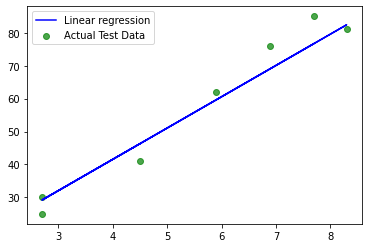

In [373]:
#prediction on test data
prediction=reg.predict(X_test)

#plot the prediction on trained data
plt.plot(X_test,prediction,label='Linear regression',color='b')
plt.scatter(X_test,Y_test,label='Actual Test Data',color='g',alpha=.7)
plt.legend()


make a prediction using the Regressor:

In [375]:
prediction=reg.predict(([[9.25]]))

prediction

array([91.40414433])

second checking of the prediction:

In [376]:
#y=mx+c 
#m is coefficient
#x is area
#c is y-intercept

m= reg.coef_
c=reg.intercept_
x=9.25
y=m*x+c

print('the coefficient =',reg.coef_)
print('the y-intercept =',reg.intercept_)
print('y =', y)


the coefficient = [9.49029534]
the y-intercept = 3.618912405895699
y = [91.40414433]


In [377]:
y_pred = reg.predict(X_test)

In [378]:
Pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
Pred_df 

,Actual,Predicted
0,41,46.325241
1,30,29.242710
2,81,82.388364
3,25,29.242710
4,62,59.611655
5,76,69.101950
6,85,76.694187


now we calculate the accuracy and the error rate for the model:

In [385]:
#Accuracy:
reg.score(X_test,Y_test)

0.9544233939235924

In [386]:
#Error:
metrics.mean_absolute_error(Y_test, y_pred)

4.186544779126649